In [15]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


Load CSV into memory

In [16]:
data=pandas.read_csv(r"C:\Users\Bojan\Downloads\uber-raw-data-apr14.txt", encoding='latin1')
data.tail()


,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


Convert datetime and add some columns

In [22]:
data['Date/Time']= data['Date/Time'].map(pandas.to_datetime)

In [18]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [23]:
def get_dom(dt):
       return dt.day
data['DoM']= data['Date/Time'].map(get_dom)

In [29]:
def get_weekday(dt):
       return dt.weekday()
data['Weekday']=data['Date/Time'].map(get_weekday)

def get_hour(dt):
      return dt.hour
data['Hour']= data['Date/Time'].map(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,DoM,Weekday,Hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


Analysis


Analyze the DoM

Text(0.5, 1.0, 'Frequency by DoM - uber - Apr 2014')

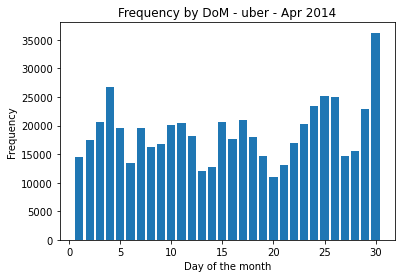

In [30]:
hist(data.DoM, bins= 30, rwidth=0.8, range=(0.5, 30.5))
xlabel('Day of the month')
ylabel('Frequency')
title('Frequency by DoM - uber - Apr 2014')

Sorted ASC 


In [42]:
def count_rows(rows):
      return len(rows)
by_date = data.groupby('DoM').apply(count_rows)
by_date_sorted = by_date.sort_values()
by_date_sorted

DoM
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

''

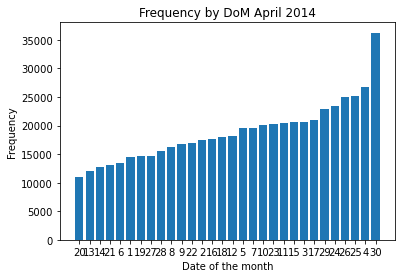

In [60]:
bar(range(1,31), by_date_sorted, linewidth=1.8)
xticks(range(1,31), by_date_sorted.index)
xlabel('Date of the month')
ylabel('Frequency')
title('Frequency by DoM April 2014')
;

Analyze the hours

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

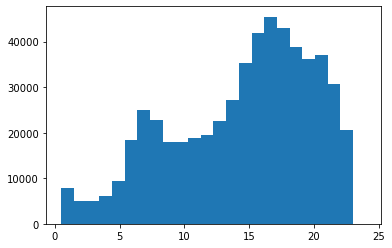

In [69]:
hist(data.Hour, bins=24, range=(.5,24))


Analyze the weekday

''

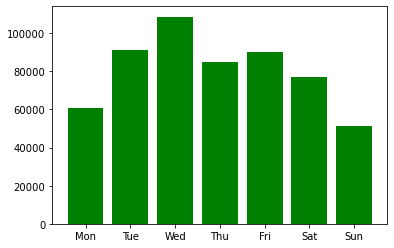

In [84]:
hist(data.Weekday, bins=7, range=(-.5,6.5),rwidth=.8,color='green')
xticks(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split())
;

Cross analysis(Hour,Date of week)

In [82]:
cross_h_w =data.groupby('Weekday Hour'.split()).apply(count_rows).unstack()
cross_h_w

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


Heat map of trips during the week

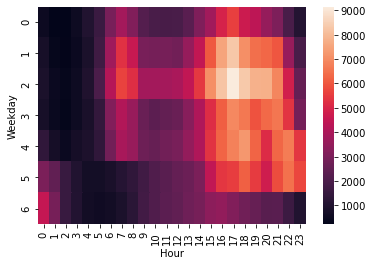

In [88]:
seaborn.heatmap(cross_h_w);

Latitude and longitude

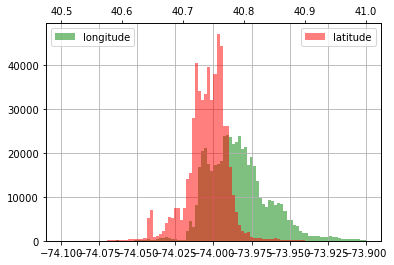

In [87]:
hist(data['Lon'],bins=100, range=(-74.1, -73.9),color='g',alpha=.5, label="longitude")
grid()
legend(loc='upper left')
twiny()
hist(data['Lat'],bins=100, range=(40.5, 41),color='r',alpha=.5, label='latitude')
legend(loc='best');